# Day6 データの可視化 - Seaborn

# Seabornを用いた可視化

In [2]:
# seabornライブラリをインポートし、snsと名付ける
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
tips = pd.read_csv("./tips/tips.csv")

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


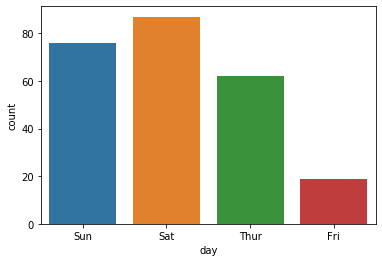

In [5]:
# 「曜日」列に存在する各要素の個数をプロット
sns.countplot(tips.day)
plt.show()

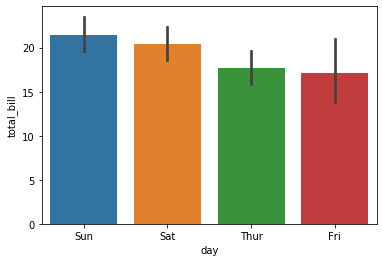

In [6]:
# 各曜日における支払総額の平均値をプロット
sns.barplot(tips.day,tips.total_bill)
plt.show()

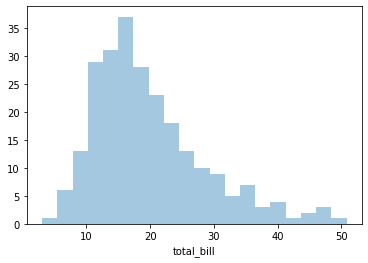

In [7]:
# snsを用いたヒストグラムの表示
# ヒストグラムを滑らかにした曲線も同時に表示される(引数にkde = Falseを指定すれば、表示をなくすことも可能)
#sns.distplot(tips.total_bill,bins=20)
sns.distplot(tips.total_bill,bins=20, kde = False)
plt.show()

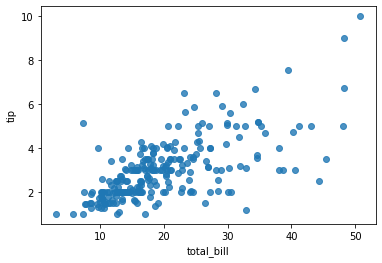

In [8]:
# 散布図の線形回帰した結果をプロット
# 95%信頼区間も表示される
sns.regplot(tips.total_bill,tips.tip, fit_reg=False)
plt.show()

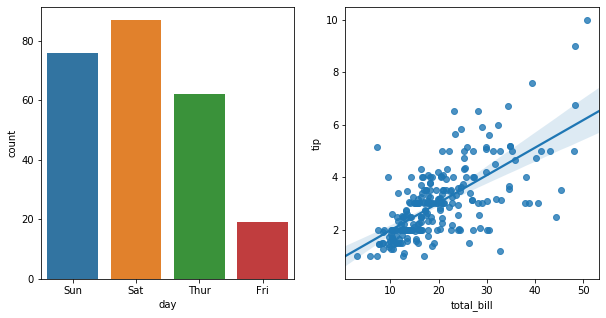

In [9]:
# seabornで描いたプロットを並べる
# countplot, regplotの引数axにaxesの名前を代入
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot(tips.day,ax=ax[0])
sns.regplot(tips.total_bill,tips.tip,ax = ax[1])
plt.show()

## 4.3 Seabornを用いた可視化 演習

### 問題１

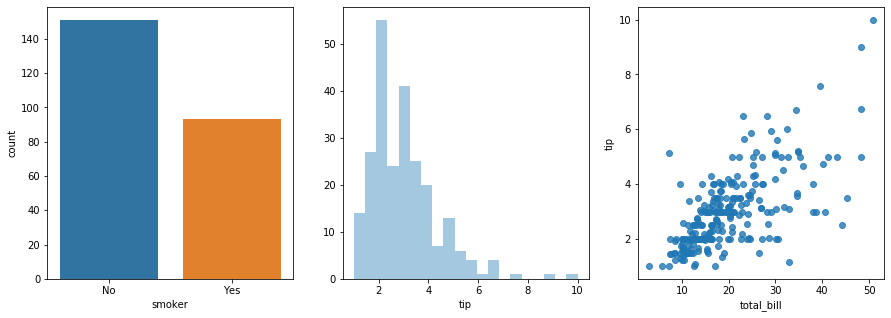

In [10]:
# 1行3列の15x5のグラフの入れ物を作成
fig,ax=plt.subplots(1,3,figsize=(15,5))

# それぞれのグラフを引数axに指定して表示
sns.countplot(tips.smoker,ax=ax[0])
sns.distplot(tips.tip,bins=20,kde = False,ax=ax[1])
sns.regplot(tips.total_bill,tips.tip,fit_reg = False,ax=ax[2])
plt.show()

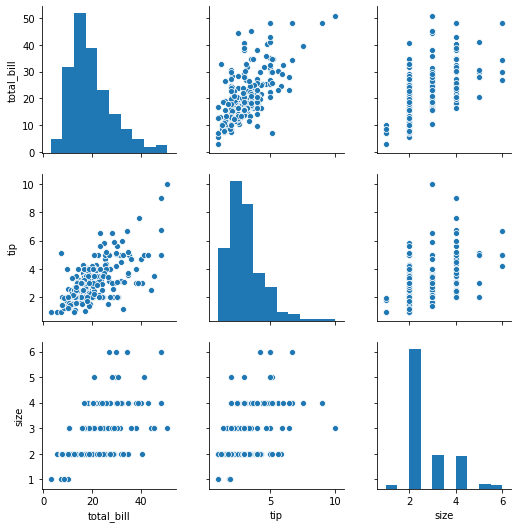

In [11]:
# 散布図行列
# 量的変数の組み合わせ分だけ、ヒストグラム・散布図を表示
sns.pairplot(tips)
plt.show()

In [12]:
# pandasの機能を利用した相関係数の可視化
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [13]:
# 背景に色を指定する
# 値が大きいほど濃い色が表示される
tips.corr().style.background_gradient("summer_r")

,total_bill,tip,size
total_bill,1,0.675734,0.598315
tip,0.675734,1,0.489299
size,0.598315,0.489299,1


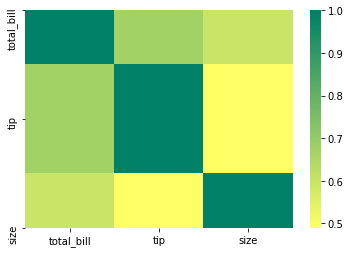

In [14]:
# seabornを利用した相関のヒートマップ化
# スケールバーが表示される
sns.heatmap(tips.corr(),cmap="summer_r")
plt.show()

## Seabornの強み

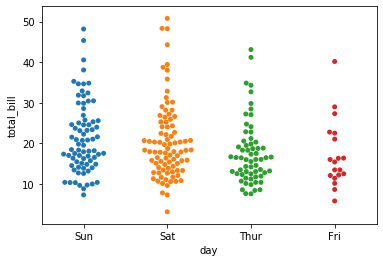

In [15]:
# カテゴリごとの分布を描画
# 横軸を曜日カテゴリに分けて、縦軸にtotal_billを指定して描画
sns.swarmplot("day","total_bill",data=tips)

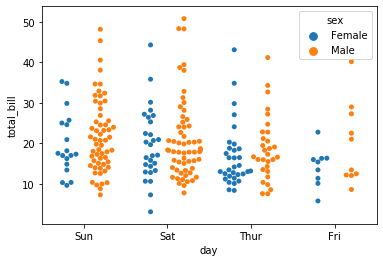

In [31]:
# カテゴリをさらにグループ別にして描画
# hueにsexを指定することで、男女で分けた表示を行う
sns.swarmplot("day","total_bill",data=tips,hue="sex",dodge=True)

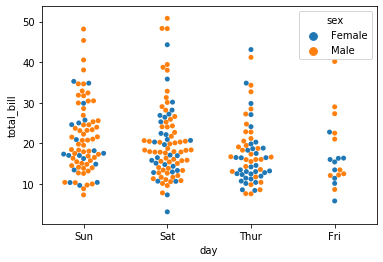

In [32]:
# dodge = Falseとすると、重なって表示される
sns.swarmplot("day","total_bill",data=tips,hue="sex",dodge=False)

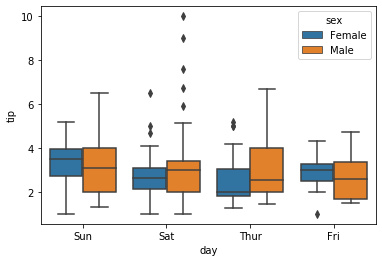

In [17]:
# 箱ひげ図の描画
# swarmplotと同じように、各曜日の男女のデータを並べて表示できる
sns.boxplot(tips.day,tips.tip,hue=tips.sex)
plt.show()

## Seabornの強み 演習

### 問題１

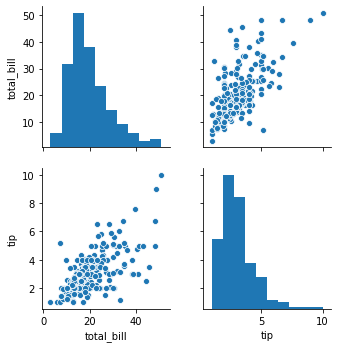

In [18]:
# tipsから"total_bill"及び"tip"列のみを抽出する
sns.pairplot(tips[["total_bill","tip"]])
plt.show()

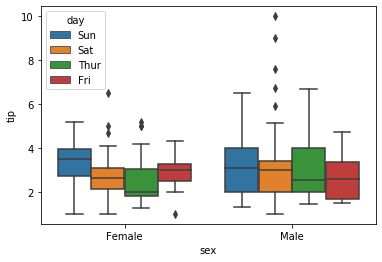

In [19]:
sns.boxplot(tips["sex"], tips["tip"], hue = tips["day"])
plt.show()

## 4.5 可視化 総合演習

## データのインポート

In [20]:
house = pd.read_csv("./house/house_data.csv")

In [21]:
house.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade,sqft_above,sqft_basement,yr_built
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,3,7,1180,0,1955
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,3,7,2170,400,1951
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,3,6,770,0,1933


In [22]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 12 columns):
id               9999 non-null int64
date             9999 non-null object
price            9999 non-null float64
bedrooms         9999 non-null int64
bathrooms        9999 non-null float64
sqft_living      9999 non-null int64
sqft_lot         9999 non-null int64
condition        9999 non-null int64
grade            9999 non-null int64
sqft_above       9999 non-null int64
sqft_basement    9999 non-null int64
yr_built         9999 non-null int64
dtypes: float64(2), int64(9), object(1)
memory usage: 937.5+ KB


### 問題１ 解答

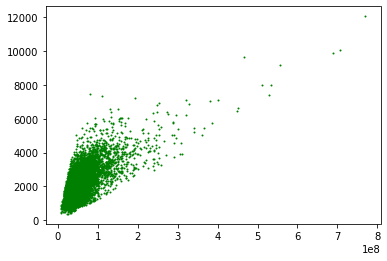

In [23]:
# １ドル１００円換算で円に変換
house["price_jp"] = house["price"]*100

# 引数sが点の大きさを調整する引数
plt.scatter(house["price_jp"] , house["sqft_living"],s=1, color="green")
plt.show()

### 問題２ 解答

In [24]:
# 参考
# condition列の要素の内訳
house["condition"].value_counts()

3    6190
4    2849
5     862
2      86
1      12
Name: condition, dtype: int64

In [25]:
# "good/bad"を仮生成
house["good/bad"] = 0

# "good/bad"列のhouse["condition"] <= 2の条件に合致する行を取り出し、"bad"を代入する
house.loc[house["condition"] <= 2, "good/bad"] = "bad"

# "good/bad"列のhouse["condition"] > 2の条件に合致する行を取り出し、"good"を代入する
house.loc[house["condition"] > 2, "good/bad"] = "good"

# 変換できていることを確認
house["good/bad"].value_counts()

good    9901
bad       98
Name: good/bad, dtype: int64

### 問題３ 解答

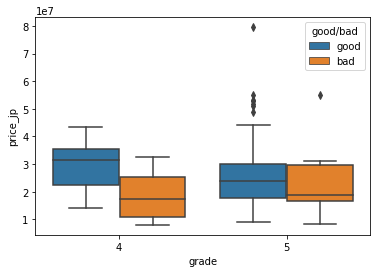

In [26]:
# データから(house["grade"] > 3) & (house["grade"] < 6) の条件に合致するものだけ抽出しておく
data = house[(house["grade"] > 3) & (house["grade"] < 6)]

# "grade"列と"price_jp"列を抽出
x = data["grade"]
y = data["price_jp"]
sns.boxplot(x, y, hue = house["good/bad"])
plt.show()

In [27]:
data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade,sqft_above,sqft_basement,yr_built,price_jp,good/bad
36,9435300030,20140528T000000,550000.0,4,1.00,1660,34848,1,5,930,730,1933,55000000.0,bad
166,2009000370,20150219T000000,269950.0,2,1.75,1340,7250,5,5,700,640,1949,26995000.0,good
263,1400300055,20150428T000000,425000.0,2,1.00,770,5040,3,5,770,0,1930,42500000.0,good
264,2123039032,20141027T000000,369900.0,1,0.75,760,10079,5,5,760,0,1936,36990000.0,good
350,7325600160,20140604T000000,299000.0,1,0.75,560,12120,3,4,560,0,1967,29900000.0,good


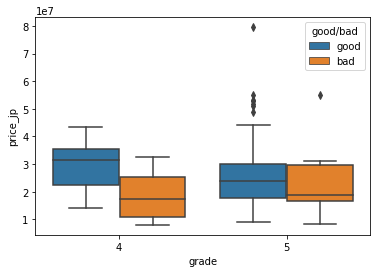

In [28]:
# 別解
sns.boxplot(x = "grade", y = "price_jp", 
            data = house[(house["grade"] > 3) & (house["grade"] < 6)], hue = house["good/bad"])
plt.show()
plt.show()